# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [2]:
from collections import OrderedDict

cars_list = []

with open('auto-mpg.data', 'r') as file:
    x = file.read().splitlines()
    for line in x:
            line=line.replace('?','0')
            tempdic = OrderedDict()          
            tempdic["mpg"] = float(line[0:4].strip())
            tempdic["cylinders"] = int(line[7:8].strip())
            tempdic["displacement"] = float(line[11:16].strip())
            tempdic["horsepower"] = float(line[22:26].strip())
            tempdic["weight"] = float(line[32:37].strip())
            tempdic["acceleration"] = float(line[43:47].strip())
            tempdic["modelyr"] = int(line[50:53].strip())
            tempdic["origin"] = int(line[54:56].strip())
            tempdic["carname"] = line[56:].strip()
            cars_list.append(tempdic)
    file.close()

cars_df = pd.DataFrame(cars_list)
cars_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyr,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.0,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.0,70,1,"""ford torino"""
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215.0,4312.0,8.0,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina"""
9,15.0,8,390.0,190.0,3850.0,8.0,70,1,"""amc ambassador dpl"""


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
modelyr         398 non-null int64
origin          398 non-null int64
carname         398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [4]:
cars_df.shape

(398, 9)

In [5]:
cars_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.50,23.0,29.0,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.00,4.0,8.0,8.0
displacement,398.0,193.425879,104.269838,68.0,104.25,148.5,262.0,455.0
horsepower,398.0,102.894472,40.269544,0.0,75.00,92.0,125.0,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.75,2803.5,3608.0,5140.0
acceleration,398.0,15.214824,2.741087,8.0,13.00,15.0,17.0,24.0
modelyr,398.0,76.010050,3.697627,70.0,73.00,76.0,79.0,82.0
origin,398.0,1.572864,0.802055,1.0,1.00,1.0,2.0,3.0


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [6]:
# While loading the data itself, '?' was replaced with '0'. 
# So, 0 should be replaced with the mean/median, considering that as the missing values

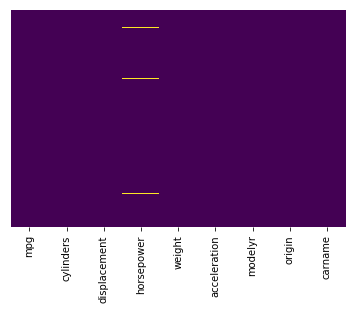

In [7]:
sns.heatmap(cars_df.replace(0, np.nan).isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
cars_df.replace(0, np.nan).isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
modelyr         0
origin          0
carname         0
dtype: int64

In [9]:
#Only Horsepower has got some missing values. That could be replaced with its mean
cars_df = cars_df.replace(0, np.nan)
cars_df['horsepower'].fillna(cars_df['horsepower'].mean(), inplace =True)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [10]:
cars_df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyr,origin
mpg,1.0,-0.78,-0.8,-0.77,-0.83,0.4,0.58,0.56
cylinders,-0.78,1.0,0.95,0.84,0.9,-0.49,-0.35,-0.56
displacement,-0.8,0.95,1.0,0.89,0.93,-0.52,-0.37,-0.61
horsepower,-0.77,0.84,0.89,1.0,0.86,-0.67,-0.41,-0.45
weight,-0.83,0.9,0.93,0.86,1.0,-0.4,-0.31,-0.58
acceleration,0.4,-0.49,-0.52,-0.67,-0.4,1.0,0.26,0.19
modelyr,0.58,-0.35,-0.37,-0.41,-0.31,0.26,1.0,0.18
origin,0.56,-0.56,-0.61,-0.45,-0.58,0.19,0.18,1.0


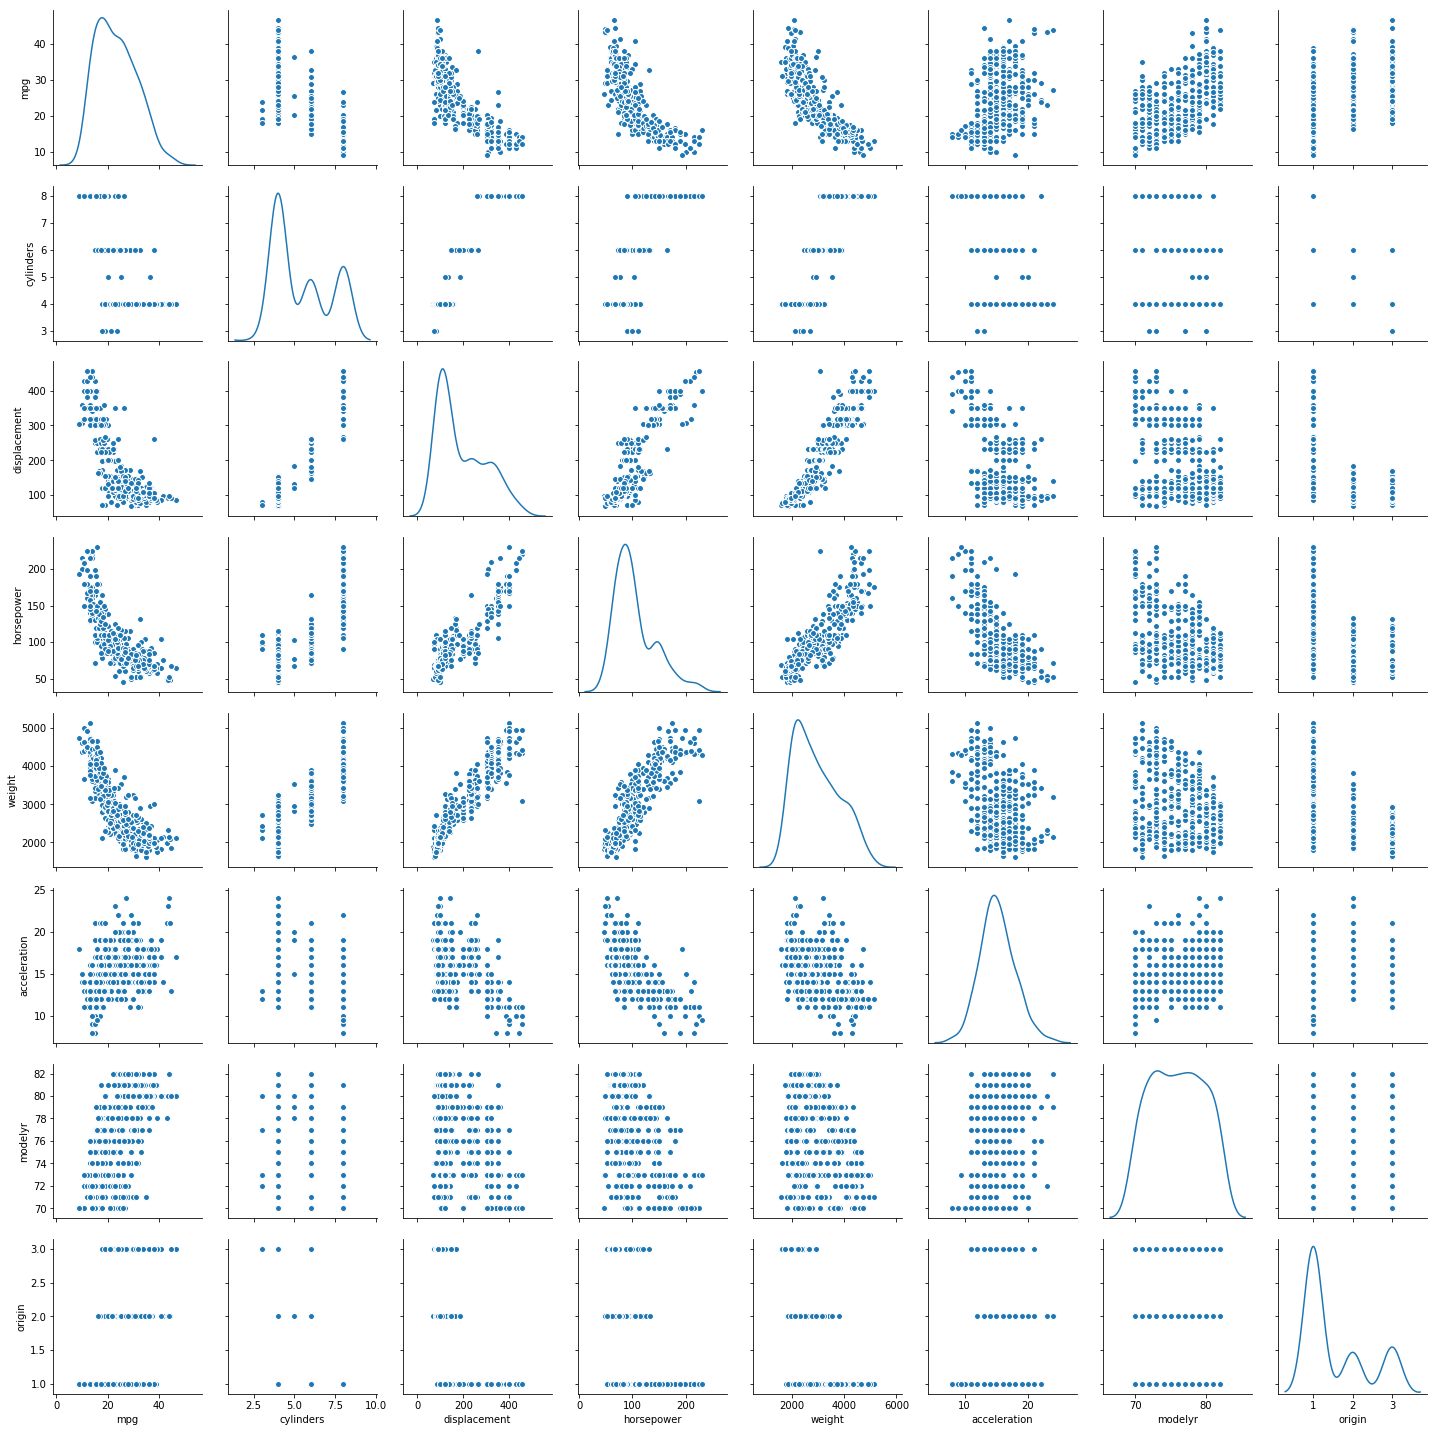

In [11]:
sns.pairplot(cars_df, diag_kind='kde')

In [12]:
#Observations
# From pairplot and correlation map, the folowing observations can be found
# 1. There is a strong correlation betwen cylinders, displacement, horsepower and weight
# 2. mpg has negative correlation with weight and horsepower
# 3. There is a linear relationship between displacement, horsepower and weight

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [13]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age

In [14]:
cars_df.groupby('origin').count()
# Max number of cars are in the region 1. Probably sample data is biased or in reality origin 1 has got more cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyr,carname
origin,,,,,,,,
1,249,249,249,249,249,249,249,249
2,70,70,70,70,70,70,70,70
3,79,79,79,79,79,79,79,79


In [15]:
cars_df[cars_df.mpg>=cars_df.mpg.mean()].groupby('cylinders').count()
# as stated in the problem statement, mpg seems to be better with 4 cylinders

,mpg,displacement,horsepower,weight,acceleration,modelyr,origin,carname
cylinders,,,,,,,,
3,1,1,1,1,1,1,1,1
4,175,175,175,175,175,175,175,175
5,2,2,2,2,2,2,2,2
6,9,9,9,9,9,9,9,9
8,2,2,2,2,2,2,2,2


In [16]:
#Breaking down origin into dummy variables
cars_df_orig = cars_df.copy()
cars_df = pd.get_dummies(cars_df, columns=['origin'])

In [17]:
cars_df['ageofcar'] = 83-cars_df.modelyr

# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [18]:
# The following columns could be dropped
cars_df.drop(['carname','displacement','modelyr'],axis=1,inplace=True)

In [19]:
from scipy import stats
#Getting only the numeric columns to check the outliers
cols_to_check = ['mpg','cylinders','horsepower','weight','acceleration','ageofcar']
df_to_check = cars_df[cols_to_check]

#Getting z-score
zdata = np.abs(stats.zscore(df_to_check))

#Selecting columns whose z-score is within 3 std
df_cars_z = df_to_check[(zdata < 3).all(axis=1)]

df = pd.DataFrame(columns=['mpg','cylinders','horsepower','weight','acceleration','origin_1','origin_2','origin_3','ageofcar'])

for id_ in df_cars_z.index:
    df = pd.DataFrame(df).append(cars_df[cars_df.index == id_])

df.shape

(391, 9)

# Q7. Create appropriate clusters with the new data set

In [20]:
from scipy.stats import zscore

df_z = df.apply(zscore)

cluster_range = range(2, 12)   # expect 3 to 9 clusters from the pair panel visual inspection hence restricting from 2 to 12
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5, random_state=1)
  clusters.fit(df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,2119.284966
1,3,1577.909126
2,4,1080.863603
3,5,908.479413
4,6,824.046809
5,7,754.233165
6,8,687.864695
7,9,632.791392
8,10,594.416130
9,11,560.153495


# Q8. Identify the appropriate clusters with result from above question

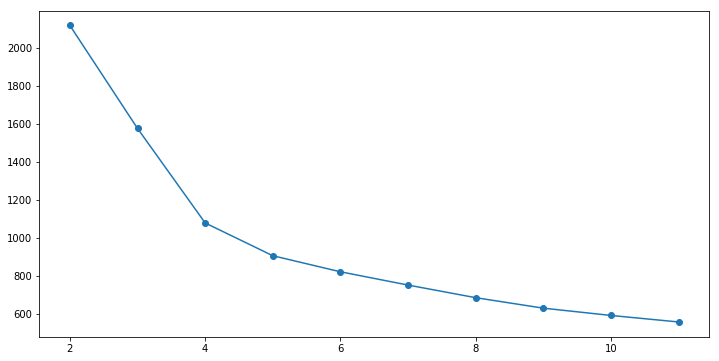

In [21]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [22]:
# By looking at the elbow plot, no of clusters should be 4

cluster = KMeans(n_clusters = 4, random_state = 1 )
cluster.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

# Q9. Check for no of values in each cluster and centers for each variables. 

In [23]:
centroids = cluster.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_z) )
centroid_df

,mpg,cylinders,horsepower,weight,acceleration,origin_1,origin_2,origin_3,ageofcar
0,-1.152741,1.511650,1.516812,1.395232,-1.024508,0.776182,-0.458831,-0.503195,0.605169
1,0.889664,-0.787774,-0.650583,-0.877488,0.203897,-1.288357,-0.458831,1.987301,-0.380328
2,0.529213,-0.751896,-0.595126,-0.644496,0.335744,-1.288357,2.179449,-0.503195,0.101495
3,0.013918,-0.191547,-0.338105,-0.120030,0.382435,0.776182,-0.458831,-0.503195,-0.224944


In [24]:
prediction=cluster.predict(df_z)
df_z["group"] = prediction
df_z.groupby('group').count()

,mpg,cylinders,horsepower,weight,acceleration,origin_1,origin_2,origin_3,ageofcar
group,,,,,,,,,
0,94,94,94,94,94,94,94,94,94
1,79,79,79,79,79,79,79,79,79
2,68,68,68,68,68,68,68,68,68
3,150,150,150,150,150,150,150,150,150


# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [25]:
df_cars_z["group"] = prediction 

C:\AIML\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
#df_cars_orig
cars_df_orig["group"] = np.nan

In [27]:
for i in df_z.index:
    cars_df_orig.loc[i,'group'] = df_z.loc[i,'group']

In [28]:
cars_df_orig.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyr,origin,carname,group
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu""",0.0
1,15.0,8,350.0,165.0,3693.0,11.0,70,1,"""buick skylark 320""",0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite""",0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst""",0.0
4,17.0,8,302.0,140.0,3449.0,10.0,70,1,"""ford torino""",0.0


In [29]:
cluster_1 = cars_df_orig[cars_df_orig.group == 0]
cluster_2 = cars_df_orig[cars_df_orig.group == 1]
cluster_3 = cars_df_orig[cars_df_orig.group == 2]
cluster_4 = cars_df_orig[cars_df_orig.group == 3]

In [30]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('results.xls')
cars_df_orig.to_excel(writer,'Cluster')
writer.save()

In [31]:
# When there are 4 clusters
# clustering happened based on origin and cylinders
# Irrespective of 4 or 3 clusters, origin 1 is divided into 2 clusters based on number of cylinders
# cluster 1 - origin :1, cylinder: 8
# cluster 2 - origin :1, cylinder: 4 and 6
# cluster 3 - origin :2 (predominantly)
# cluster 4 - origin :3 (predominantly)

# when did with 3 clusters, cluster 3 and 4 are merged into 1

In [32]:
# We can try similar analysis for 3 grps as well to check if we get more clear distinction among groups